# Task 2: Quantitative Analysis using TA-Lib and PyNance

## Financial Technical Indicators and Metrics Analysis

This notebook performs quantitative analysis on stock price data including:
- Loading and preparing stock price data
- Calculating technical indicators (MA, RSI, MACD) using TA-Lib
- Using PyNance for financial metrics
- Visualizing technical indicators and stock performance


## 1. Import Libraries and Setup


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Financial analysis libraries
try:
    import talib
    TALIB_AVAILABLE = True
    print("TA-Lib imported successfully!")
except ImportError:
    TALIB_AVAILABLE = False
    print("Warning: TA-Lib not available. Using alternative calculations.")
    print("Note: TA-Lib requires C++ build tools on Windows. Install from: https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib")

try:
    import pynance as pn
    PYNANCE_AVAILABLE = True
    print("PyNance imported successfully!")
except ImportError:
    PYNANCE_AVAILABLE = False
    print("Warning: PyNance not available. Using pandas for calculations.")

print("\nLibraries imported successfully!")


Note: TA-Lib requires C++ build tools on Windows. Install from: https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib

Libraries imported successfully!


## 2. Load and Prepare Stock Price Data


In [2]:
# List of available stock symbols
stock_symbols = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']

# Load stock data
stock_data = {}
for symbol in stock_symbols:
    try:
        df = pd.read_csv(f'../data/{symbol}.csv')
        # Convert Date to datetime
        df['Date'] = pd.to_datetime(df['Date'])
        # Set Date as index
        df.set_index('Date', inplace=True)
        # Ensure columns are numeric
        for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        stock_data[symbol] = df
        print(f"✓ Loaded {symbol}: {len(df)} rows, from {df.index.min()} to {df.index.max()}")
    except FileNotFoundError:
        print(f"✗ File not found: {symbol}.csv")
    except Exception as e:
        print(f"✗ Error loading {symbol}: {e}")

print(f"\nTotal stocks loaded: {len(stock_data)}")


✓ Loaded AAPL: 3774 rows, from 2009-01-02 00:00:00 to 2023-12-29 00:00:00
✓ Loaded AMZN: 3774 rows, from 2009-01-02 00:00:00 to 2023-12-29 00:00:00
✓ Loaded GOOG: 3774 rows, from 2009-01-02 00:00:00 to 2023-12-29 00:00:00
✓ Loaded META: 2923 rows, from 2012-05-18 00:00:00 to 2023-12-29 00:00:00
✓ Loaded MSFT: 3774 rows, from 2009-01-02 00:00:00 to 2023-12-29 00:00:00
✓ Loaded NVDA: 3774 rows, from 2009-01-02 00:00:00 to 2023-12-29 00:00:00

Total stocks loaded: 6


In [3]:
# Display sample data for one stock
if stock_data:
    sample_symbol = list(stock_data.keys())[0]
    print(f"Sample data for {sample_symbol}:")
    print(stock_data[sample_symbol].head(10))
    print(f"\nData shape: {stock_data[sample_symbol].shape}")
    print(f"\nData info:")
    print(stock_data[sample_symbol].info())


Sample data for AAPL:
               Close      High       Low      Open      Volume
Date                                                          
2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800
2009-01-09  2.716589  2.800564  2.703393  2.795466   546845600
2009-01-12  2.659007  2.728886  2.625717  2.712990   617716400
2009-01-13  2.630514  2.691395  2.589726  2.646409   798397600
2009-01-14  2.559135  2.616717  2.540840  2.586427  1021664000
2009-01-15  2.500652  2.522846  2.400782  2.416377  1831634000

Data shape: (3774, 5)

Data info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  -------------

## 3. Calculate Technical Indicators using TA-Lib

### 3.1 Moving Averages (MA)


In [4]:
def calculate_moving_averages(df, talib_available=True):
    """Calculate Simple Moving Average (SMA) and Exponential Moving Average (EMA)"""
    close = df['Close'].values
    
    if talib_available and TALIB_AVAILABLE:
        # Using TA-Lib
        df['SMA_20'] = talib.SMA(close, timeperiod=20)
        df['SMA_50'] = talib.SMA(close, timeperiod=50)
        df['SMA_200'] = talib.SMA(close, timeperiod=200)
        df['EMA_12'] = talib.EMA(close, timeperiod=12)
        df['EMA_26'] = talib.EMA(close, timeperiod=26)
    else:
        # Using pandas (alternative if TA-Lib not available)
        df['SMA_20'] = df['Close'].rolling(window=20).mean()
        df['SMA_50'] = df['Close'].rolling(window=50).mean()
        df['SMA_200'] = df['Close'].rolling(window=200).mean()
        df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
        df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    
    return df

# Calculate moving averages for all stocks
for symbol in stock_data.keys():
    stock_data[symbol] = calculate_moving_averages(stock_data[symbol], TALIB_AVAILABLE)
    print(f"✓ Calculated moving averages for {symbol}")

# Display sample
sample_symbol = list(stock_data.keys())[0]
print(f"\nSample moving averages for {sample_symbol}:")
print(stock_data[sample_symbol][['Close', 'SMA_20', 'SMA_50', 'EMA_12', 'EMA_26']].tail(10))


✓ Calculated moving averages for AAPL
✓ Calculated moving averages for AMZN
✓ Calculated moving averages for GOOG
✓ Calculated moving averages for META
✓ Calculated moving averages for MSFT
✓ Calculated moving averages for NVDA

Sample moving averages for AAPL:
                 Close      SMA_20      SMA_50      EMA_12      EMA_26
Date                                                                  
2023-12-15  195.721619  190.723320  181.953393  192.632315  188.886407
2023-12-18  194.057343  191.030421  182.322577  192.851550  189.269439
2023-12-19  195.097504  191.302353  182.682884  193.197081  189.701147
2023-12-20  193.007248  191.509893  183.013258  193.167876  189.946044
2023-12-21  192.858643  191.676816  183.312761  193.120302  190.161792
2023-12-22  191.788757  191.856618  183.572859  192.915449  190.282308
2023-12-26  191.243912  192.018094  183.858864  192.658289  190.353538
2023-12-27  191.342972  192.154308  184.149424  192.455933  190.426829
2023-12-28  191.768951  192.

### 3.2 Relative Strength Index (RSI)


In [5]:
def calculate_rsi(df, period=14, talib_available=True):
    """Calculate Relative Strength Index (RSI)"""
    close = df['Close'].values
    
    if talib_available and TALIB_AVAILABLE:
        # Using TA-Lib
        df['RSI'] = talib.RSI(close, timeperiod=period)
    else:
        # Using pandas (alternative calculation)
        delta = df['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        rs = gain / loss
        df['RSI'] = 100 - (100 / (1 + rs))
    
    return df

# Calculate RSI for all stocks
for symbol in stock_data.keys():
    stock_data[symbol] = calculate_rsi(stock_data[symbol], period=14, talib_available=TALIB_AVAILABLE)
    print(f"✓ Calculated RSI for {symbol}")

# Display sample
sample_symbol = list(stock_data.keys())[0]
print(f"\nSample RSI for {sample_symbol}:")
print(stock_data[sample_symbol][['Close', 'RSI']].tail(10))


✓ Calculated RSI for AAPL
✓ Calculated RSI for AMZN
✓ Calculated RSI for GOOG
✓ Calculated RSI for META
✓ Calculated RSI for MSFT
✓ Calculated RSI for NVDA

Sample RSI for AAPL:
                 Close        RSI
Date                             
2023-12-15  195.721619  67.844044
2023-12-18  194.057343  62.002656
2023-12-19  195.097504  66.535539
2023-12-20  193.007248  59.991800
2023-12-21  192.858643  57.388276
2023-12-22  191.788757  59.246127
2023-12-26  191.243912  49.031899
2023-12-27  191.342972  52.291510
2023-12-28  191.768951  47.920425
2023-12-29  190.728775  40.185234


### 3.3 MACD (Moving Average Convergence Divergence)


In [6]:
def calculate_macd(df, talib_available=True):
    """Calculate MACD (Moving Average Convergence Divergence)"""
    close = df['Close'].values
    
    if talib_available and TALIB_AVAILABLE:
        # Using TA-Lib
        macd, signal, histogram = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
        df['MACD'] = macd
        df['MACD_signal'] = signal
        df['MACD_histogram'] = histogram
    else:
        # Using pandas (alternative calculation)
        ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
        ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
        df['MACD'] = ema_12 - ema_26
        df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
        df['MACD_histogram'] = df['MACD'] - df['MACD_signal']
    
    return df

# Calculate MACD for all stocks
for symbol in stock_data.keys():
    stock_data[symbol] = calculate_macd(stock_data[symbol], talib_available=TALIB_AVAILABLE)
    print(f"✓ Calculated MACD for {symbol}")

# Display sample
sample_symbol = list(stock_data.keys())[0]
print(f"\nSample MACD for {sample_symbol}:")
print(stock_data[sample_symbol][['Close', 'MACD', 'MACD_signal', 'MACD_histogram']].tail(10))


✓ Calculated MACD for AAPL
✓ Calculated MACD for AMZN
✓ Calculated MACD for GOOG
✓ Calculated MACD for META
✓ Calculated MACD for MSFT
✓ Calculated MACD for NVDA

Sample MACD for AAPL:
                 Close      MACD  MACD_signal  MACD_histogram
Date                                                         
2023-12-15  195.721619  3.745908     3.574956        0.170952
2023-12-18  194.057343  3.582111     3.576387        0.005724
2023-12-19  195.097504  3.495934     3.560297       -0.064363
2023-12-20  193.007248  3.221832     3.492604       -0.270771
2023-12-21  192.858643  2.958510     3.385785       -0.427275
2023-12-22  191.788757  2.633141     3.235256       -0.602115
2023-12-26  191.243912  2.304751     3.049155       -0.744404
2023-12-27  191.342972  2.029104     2.845145       -0.816041
2023-12-28  191.768951  1.823998     2.640915       -0.816918
2023-12-29  190.728775  1.559539     2.424640       -0.865101


## 4. Additional Technical Indicators


In [7]:
def calculate_additional_indicators(df, talib_available=True):
    """Calculate additional technical indicators"""
    high = df['High'].values
    low = df['Low'].values
    close = df['Close'].values
    volume = df['Volume'].values
    
    if talib_available and TALIB_AVAILABLE:
        # Bollinger Bands
        upper, middle, lower = talib.BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
        df['BB_upper'] = upper
        df['BB_middle'] = middle
        df['BB_lower'] = lower
        
        # Average True Range (ATR)
        df['ATR'] = talib.ATR(high, low, close, timeperiod=14)
        
        # Stochastic Oscillator
        slowk, slowd = talib.STOCH(high, low, close, fastk_period=14, slowk_period=3, slowd_period=3)
        df['Stoch_K'] = slowk
        df['Stoch_D'] = slowd
    else:
        # Using pandas alternatives
        # Bollinger Bands
        df['BB_middle'] = df['Close'].rolling(window=20).mean()
        std = df['Close'].rolling(window=20).std()
        df['BB_upper'] = df['BB_middle'] + (std * 2)
        df['BB_lower'] = df['BB_middle'] - (std * 2)
        
        # ATR (simplified)
        tr1 = df['High'] - df['Low']
        tr2 = abs(df['High'] - df['Close'].shift())
        tr3 = abs(df['Low'] - df['Close'].shift())
        tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
        df['ATR'] = tr.rolling(window=14).mean()
    
    return df

# Calculate additional indicators for all stocks
for symbol in stock_data.keys():
    stock_data[symbol] = calculate_additional_indicators(stock_data[symbol], talib_available=TALIB_AVAILABLE)
    print(f"✓ Calculated additional indicators for {symbol}")


✓ Calculated additional indicators for AAPL
✓ Calculated additional indicators for AMZN
✓ Calculated additional indicators for GOOG
✓ Calculated additional indicators for META
✓ Calculated additional indicators for MSFT
✓ Calculated additional indicators for NVDA


## 5. Financial Metrics using PyNance (Alternative: Pandas Calculations)


In [8]:
def calculate_financial_metrics(df, symbol):
    """Calculate financial metrics using PyNance or pandas"""
    metrics = {}
    
    # Daily returns
    df['Daily_Return'] = df['Close'].pct_change()
    
    # Cumulative returns
    df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1
    
    # Volatility (rolling 30-day)
    df['Volatility'] = df['Daily_Return'].rolling(window=30).std() * np.sqrt(252)  # Annualized
    
    # Calculate metrics
    metrics['Symbol'] = symbol
    metrics['Total_Return'] = df['Cumulative_Return'].iloc[-1] * 100
    metrics['Annualized_Return'] = ((df['Close'].iloc[-1] / df['Close'].iloc[0]) ** (252 / len(df)) - 1) * 100
    metrics['Volatility_30d'] = df['Volatility'].iloc[-1] * 100
    metrics['Max_Drawdown'] = ((df['Close'] / df['Close'].expanding().max()) - 1).min() * 100
    metrics['Sharpe_Ratio'] = (metrics['Annualized_Return'] / metrics['Volatility_30d']) if metrics['Volatility_30d'] > 0 else 0
    
    # Price statistics
    metrics['Current_Price'] = df['Close'].iloc[-1]
    metrics['52W_High'] = df['High'].rolling(window=252).max().iloc[-1]
    metrics['52W_Low'] = df['Low'].rolling(window=252).min().iloc[-1]
    metrics['Avg_Volume'] = df['Volume'].mean()
    
    return df, metrics

# Calculate financial metrics for all stocks
all_metrics = []
for symbol in stock_data.keys():
    stock_data[symbol], metrics = calculate_financial_metrics(stock_data[symbol], symbol)
    all_metrics.append(metrics)
    print(f"✓ Calculated financial metrics for {symbol}")

# Create metrics dataframe
metrics_df = pd.DataFrame(all_metrics)
print("\nFinancial Metrics Summary:")
print("="*80)
print(metrics_df.to_string(index=False))


✓ Calculated financial metrics for AAPL
✓ Calculated financial metrics for AMZN
✓ Calculated financial metrics for GOOG
✓ Calculated financial metrics for META
✓ Calculated financial metrics for MSFT
✓ Calculated financial metrics for NVDA

Financial Metrics Summary:
Symbol  Total_Return  Annualized_Return  Volatility_30d  Max_Drawdown  Sharpe_Ratio  Current_Price   52W_High    52W_Low   Avg_Volume
  AAPL   6907.742611          32.811032       12.687769    -43.797147      2.586036     190.728775 197.752460 122.324579 2.640640e+08
  AMZN   5490.140032          30.821779       17.925280    -56.145263      1.719459     151.940002 155.630005  81.430000 9.185184e+07
  GOOG   1660.964064          21.110576       23.846325    -44.601852      0.885276     139.972137 142.966658  84.988398 6.123096e+07
  META    825.869815          21.151549       22.283854    -76.736090      0.949187     351.791290 359.682686 115.060690 3.060615e+07
  MSFT   2395.863575          23.964161       16.521404    -37

## 6. Visualizations

### 6.1 Price Chart with Moving Averages


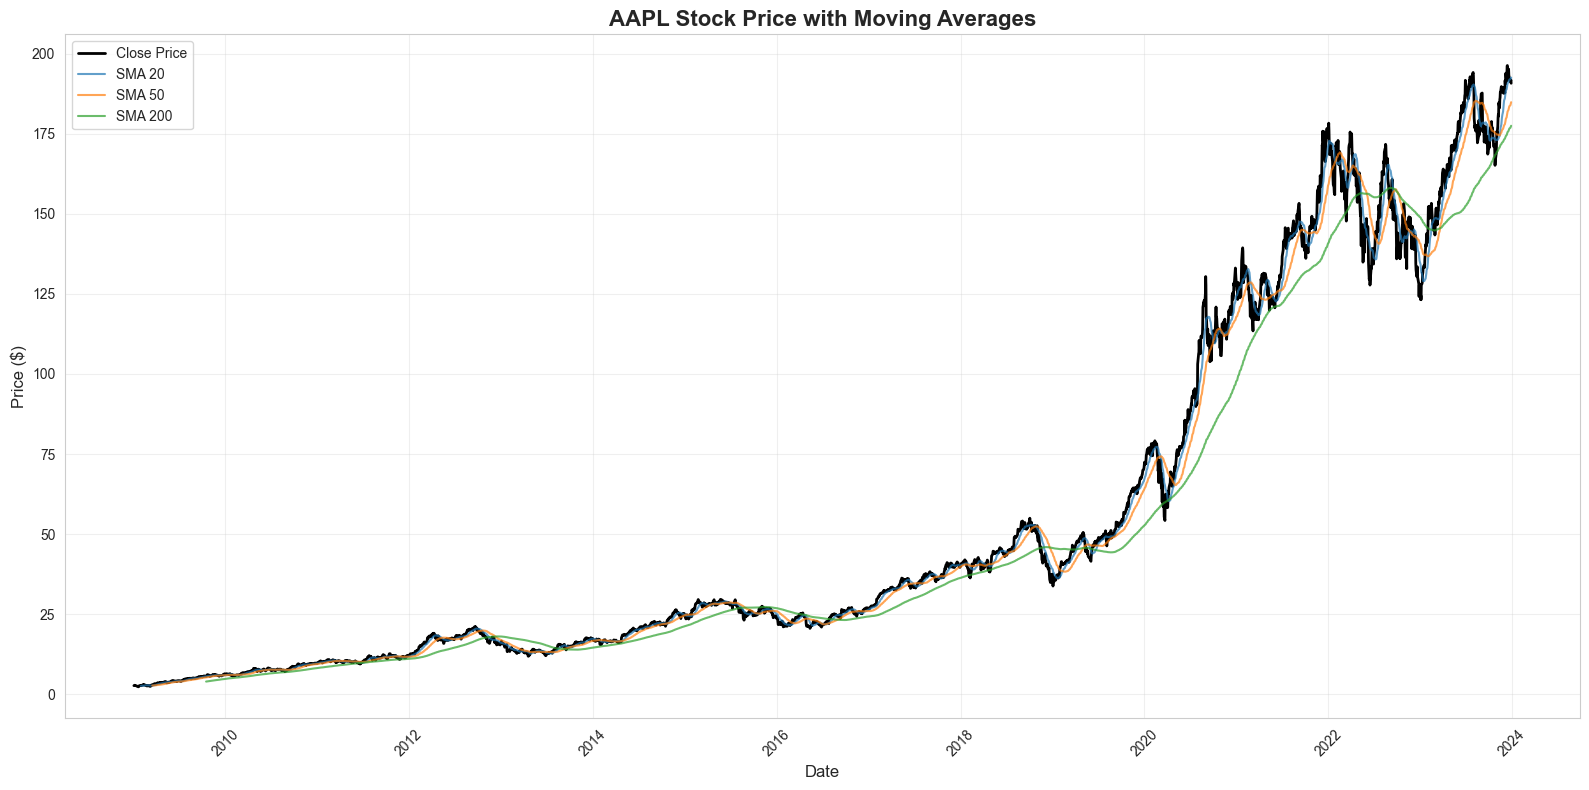

In [9]:
def plot_price_with_ma(df, symbol, title_suffix=""):
    """Plot stock price with moving averages"""
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Plot price
    ax.plot(df.index, df['Close'], label='Close Price', linewidth=2, color='black')
    
    # Plot moving averages
    if 'SMA_20' in df.columns:
        ax.plot(df.index, df['SMA_20'], label='SMA 20', alpha=0.7, linewidth=1.5)
    if 'SMA_50' in df.columns:
        ax.plot(df.index, df['SMA_50'], label='SMA 50', alpha=0.7, linewidth=1.5)
    if 'SMA_200' in df.columns:
        ax.plot(df.index, df['SMA_200'], label='SMA 200', alpha=0.7, linewidth=1.5)
    
    ax.set_title(f'{symbol} Stock Price with Moving Averages{title_suffix}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price ($)', fontsize=12)
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot for first stock as example
if stock_data:
    sample_symbol = list(stock_data.keys())[0]
    plot_price_with_ma(stock_data[sample_symbol], sample_symbol)


### 6.2 RSI Indicator


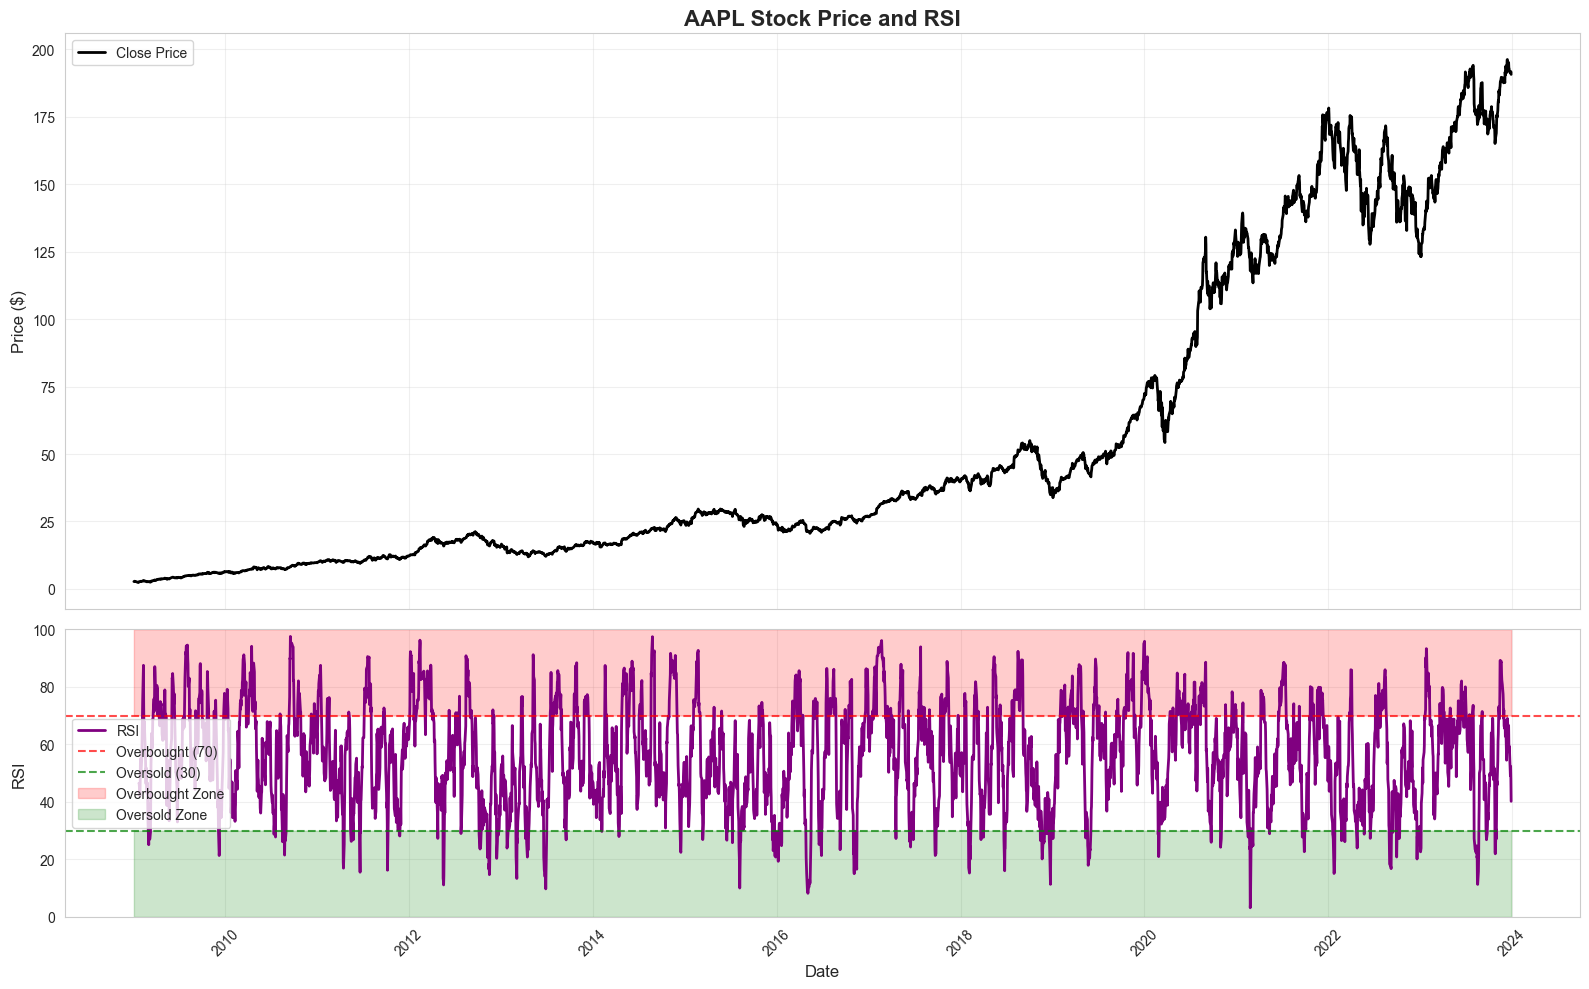

In [10]:
def plot_rsi(df, symbol):
    """Plot RSI indicator"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    
    # Price chart
    ax1.plot(df.index, df['Close'], label='Close Price', linewidth=2, color='black')
    ax1.set_title(f'{symbol} Stock Price and RSI', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Price ($)', fontsize=12)
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    
    # RSI chart
    ax2.plot(df.index, df['RSI'], label='RSI', linewidth=2, color='purple')
    ax2.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
    ax2.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')
    ax2.fill_between(df.index, 70, 100, alpha=0.2, color='red', label='Overbought Zone')
    ax2.fill_between(df.index, 0, 30, alpha=0.2, color='green', label='Oversold Zone')
    ax2.set_ylabel('RSI', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylim(0, 100)
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot RSI for first stock
if stock_data:
    sample_symbol = list(stock_data.keys())[0]
    plot_rsi(stock_data[sample_symbol], sample_symbol)


### 6.3 MACD Indicator


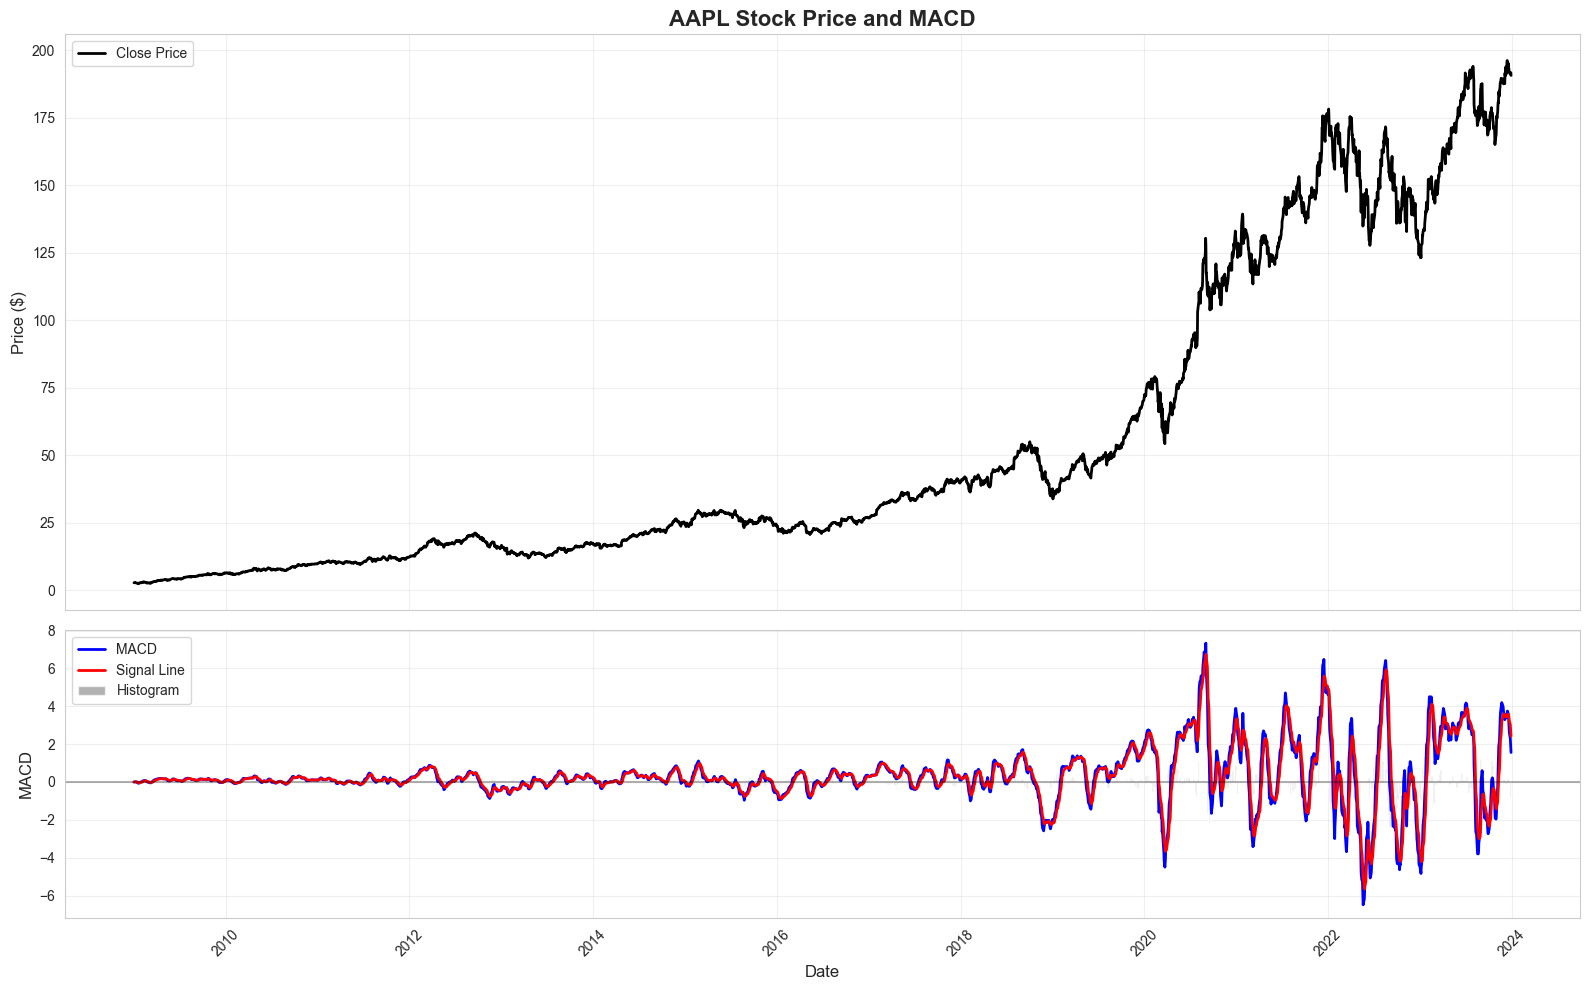

In [11]:
def plot_macd(df, symbol):
    """Plot MACD indicator"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    
    # Price chart
    ax1.plot(df.index, df['Close'], label='Close Price', linewidth=2, color='black')
    ax1.set_title(f'{symbol} Stock Price and MACD', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Price ($)', fontsize=12)
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    
    # MACD chart
    ax2.plot(df.index, df['MACD'], label='MACD', linewidth=2, color='blue')
    ax2.plot(df.index, df['MACD_signal'], label='Signal Line', linewidth=2, color='red')
    ax2.bar(df.index, df['MACD_histogram'], label='Histogram', alpha=0.6, color='gray')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.set_ylabel('MACD', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot MACD for first stock
if stock_data:
    sample_symbol = list(stock_data.keys())[0]
    plot_macd(stock_data[sample_symbol], sample_symbol)


### 6.4 Bollinger Bands


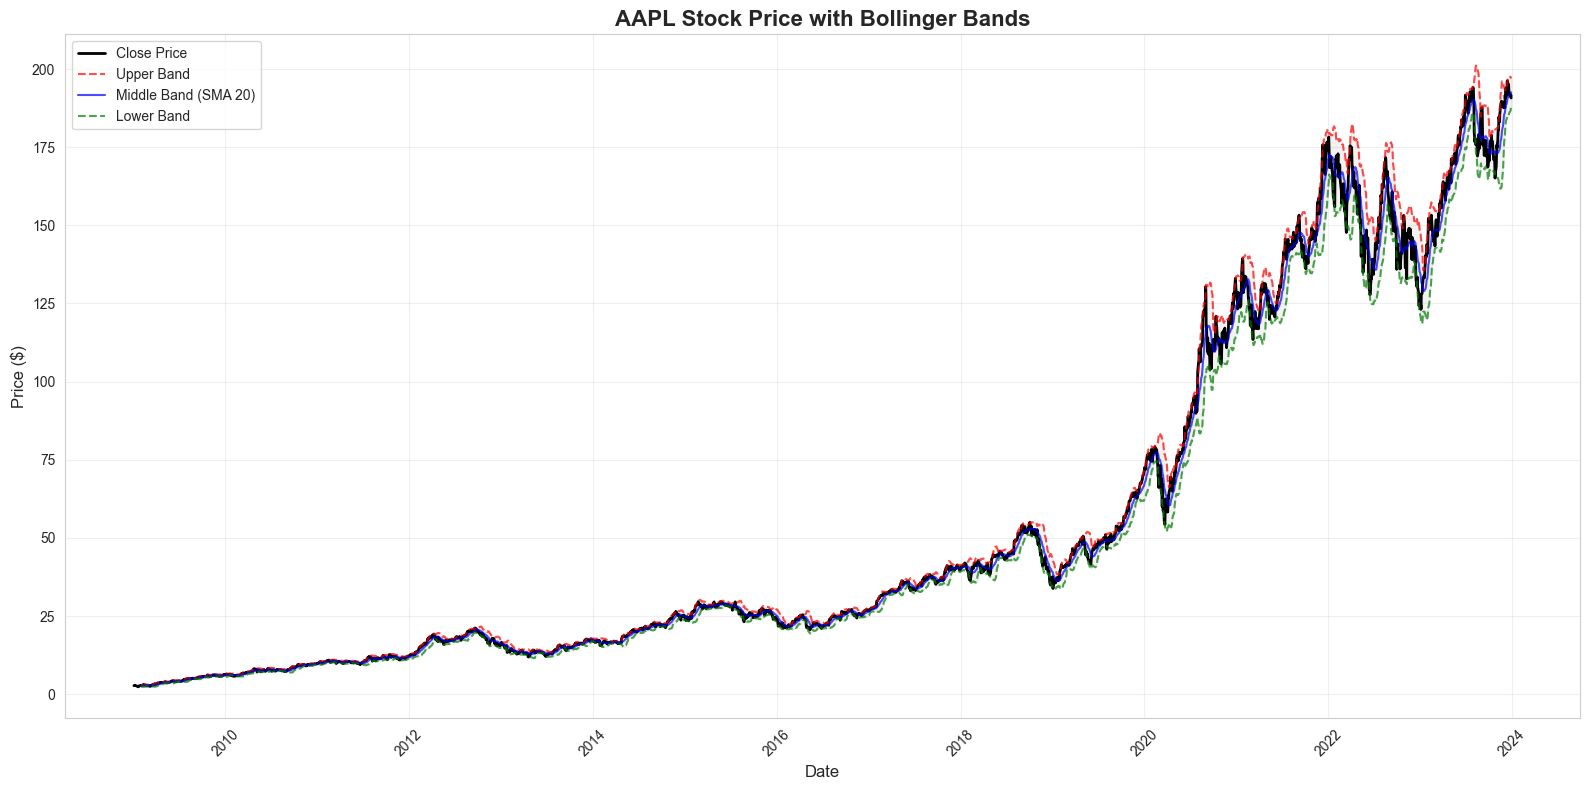

In [12]:
def plot_bollinger_bands(df, symbol):
    """Plot Bollinger Bands"""
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Plot price
    ax.plot(df.index, df['Close'], label='Close Price', linewidth=2, color='black')
    
    # Plot Bollinger Bands
    if 'BB_upper' in df.columns:
        ax.plot(df.index, df['BB_upper'], label='Upper Band', alpha=0.7, color='red', linestyle='--')
        ax.plot(df.index, df['BB_middle'], label='Middle Band (SMA 20)', alpha=0.7, color='blue', linestyle='-')
        ax.plot(df.index, df['BB_lower'], label='Lower Band', alpha=0.7, color='green', linestyle='--')
        ax.fill_between(df.index, df['BB_upper'], df['BB_lower'], alpha=0.1, color='gray')
    
    ax.set_title(f'{symbol} Stock Price with Bollinger Bands', fontsize=16, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price ($)', fontsize=12)
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot Bollinger Bands for first stock
if stock_data:
    sample_symbol = list(stock_data.keys())[0]
    plot_bollinger_bands(stock_data[sample_symbol], sample_symbol)


### 6.5 Comparison of All Stocks


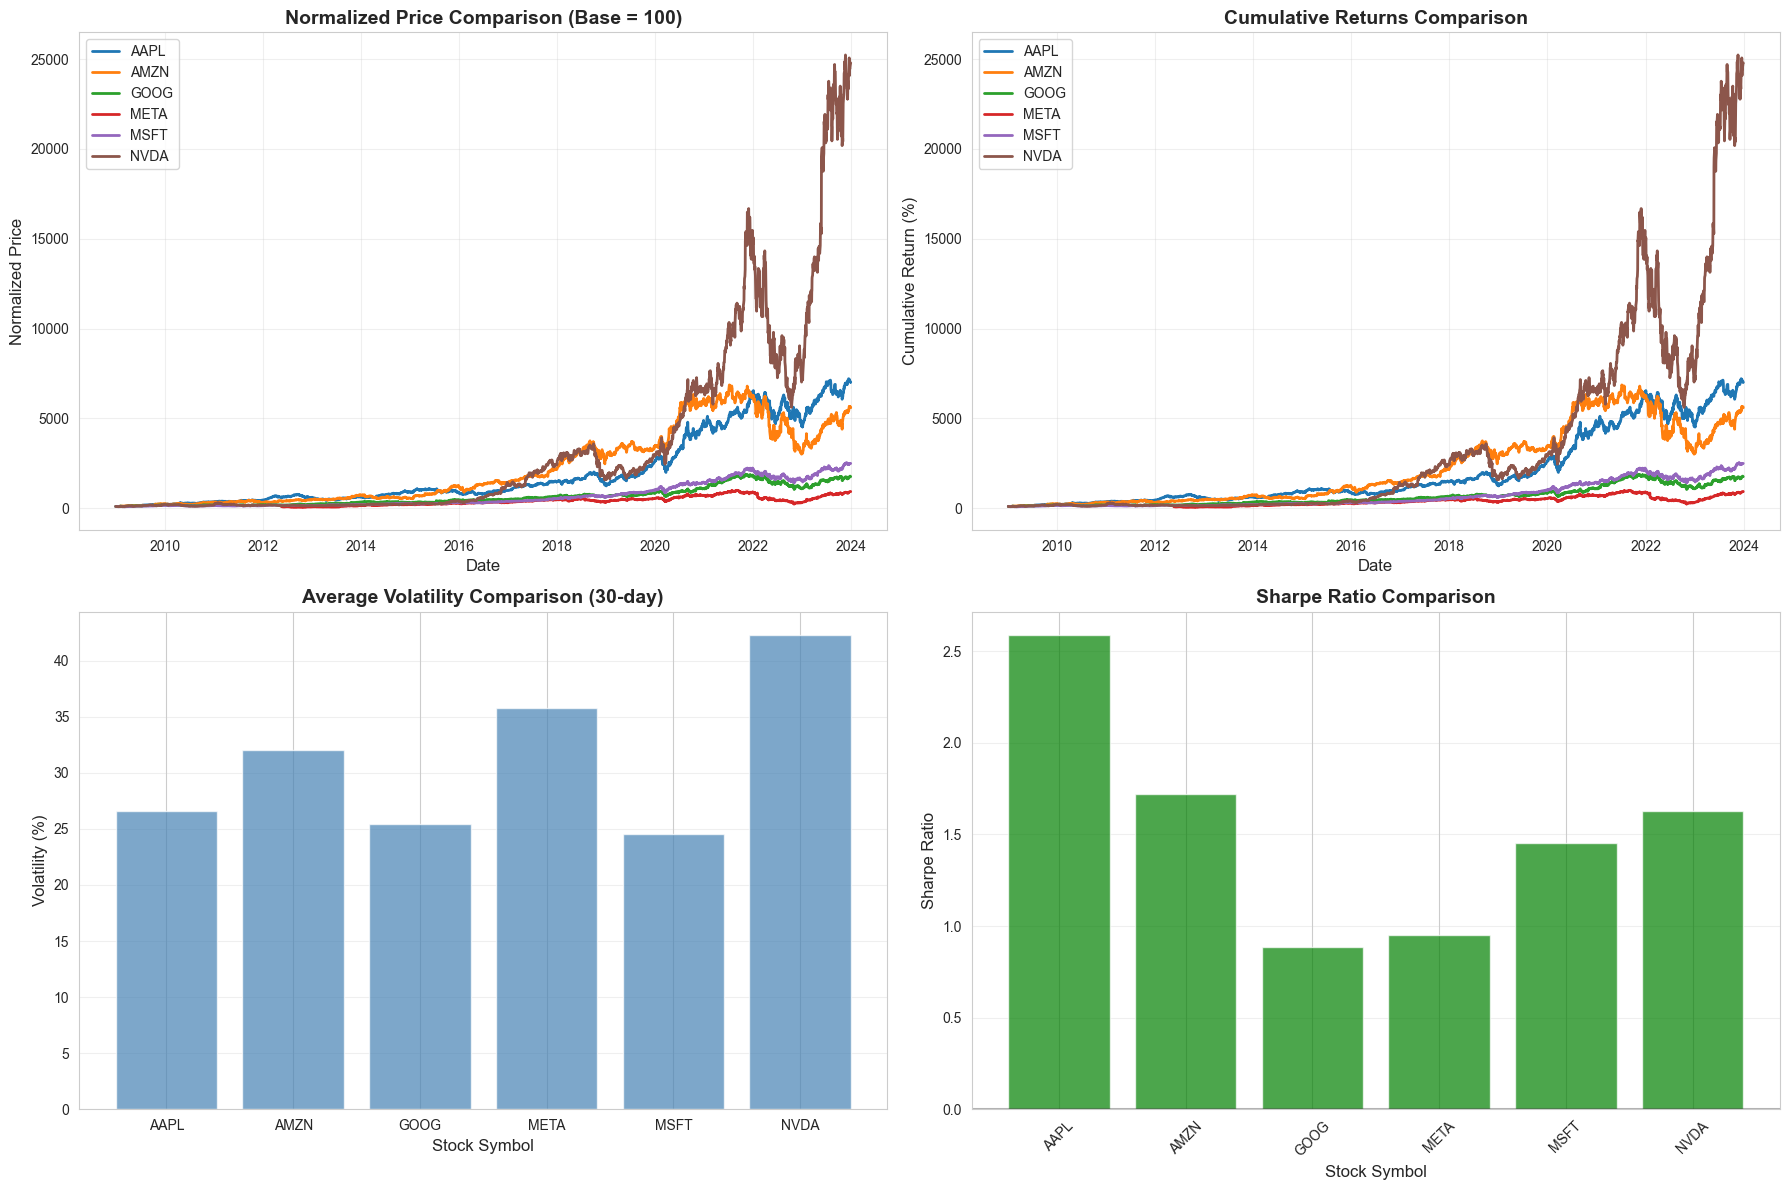

In [13]:
# Normalize prices to compare performance
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Normalized price comparison
ax1 = axes[0, 0]
for symbol in stock_data.keys():
    df = stock_data[symbol]
    normalized = (df['Close'] / df['Close'].iloc[0]) * 100
    ax1.plot(df.index, normalized, label=symbol, linewidth=2)
ax1.set_title('Normalized Price Comparison (Base = 100)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Normalized Price', fontsize=12)
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# 2. Returns comparison
ax2 = axes[0, 1]
for symbol in stock_data.keys():
    df = stock_data[symbol]
    if 'Daily_Return' in df.columns:
        cumulative = (1 + df['Daily_Return']).cumprod() * 100
        ax2.plot(df.index, cumulative, label=symbol, linewidth=2)
ax2.set_title('Cumulative Returns Comparison', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Cumulative Return (%)', fontsize=12)
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)

# 3. Volatility comparison
ax3 = axes[1, 0]
volatility_data = []
for symbol in stock_data.keys():
    df = stock_data[symbol]
    if 'Volatility' in df.columns:
        avg_vol = df['Volatility'].mean() * 100
        volatility_data.append({'Symbol': symbol, 'Volatility': avg_vol})
if volatility_data:
    vol_df = pd.DataFrame(volatility_data)
    ax3.bar(vol_df['Symbol'], vol_df['Volatility'], color='steelblue', alpha=0.7)
    ax3.set_title('Average Volatility Comparison (30-day)', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Stock Symbol', fontsize=12)
    ax3.set_ylabel('Volatility (%)', fontsize=12)
    ax3.grid(True, alpha=0.3, axis='y')

# 4. Sharpe Ratio comparison
ax4 = axes[1, 1]
if 'Sharpe_Ratio' in metrics_df.columns:
    ax4.bar(metrics_df['Symbol'], metrics_df['Sharpe_Ratio'], color='green', alpha=0.7)
    ax4.set_title('Sharpe Ratio Comparison', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Stock Symbol', fontsize=12)
    ax4.set_ylabel('Sharpe Ratio', fontsize=12)
    ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax4.grid(True, alpha=0.3, axis='y')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
print("="*80)
print("TASK 2: QUANTITATIVE ANALYSIS SUMMARY")
print("="*80)

print(f"\n1. DATA OVERVIEW:")
print(f"   - Stocks analyzed: {len(stock_data)}")
print(f"   - Stock symbols: {', '.join(stock_data.keys())}")

print(f"\n2. TECHNICAL INDICATORS CALCULATED:")
print(f"   ✓ Moving Averages (SMA 20, 50, 200; EMA 12, 26)")
print(f"   ✓ Relative Strength Index (RSI)")
print(f"   ✓ MACD (Moving Average Convergence Divergence)")
print(f"   ✓ Bollinger Bands")
print(f"   ✓ Average True Range (ATR)")

print(f"\n3. FINANCIAL METRICS CALCULATED:")
if not metrics_df.empty:
    print(f"   - Total Returns: {metrics_df['Total_Return'].max():.2f}% (best performer)")
    print(f"   - Average Volatility: {metrics_df['Volatility_30d'].mean():.2f}%")
    print(f"   - Best Sharpe Ratio: {metrics_df['Sharpe_Ratio'].max():.2f}")

print(f"\n4. ANALYSIS TOOLS:")
print(f"   - TA-Lib: {'Available' if TALIB_AVAILABLE else 'Not available (using pandas alternatives)'}")
print(f"   - PyNance: {'Available' if PYNANCE_AVAILABLE else 'Not available (using pandas calculations)'}")

print("\n" + "="*80)


TASK 2: QUANTITATIVE ANALYSIS SUMMARY

1. DATA OVERVIEW:
   - Stocks analyzed: 6
   - Stock symbols: AAPL, AMZN, GOOG, META, MSFT, NVDA

2. TECHNICAL INDICATORS CALCULATED:
   ✓ Moving Averages (SMA 20, 50, 200; EMA 12, 26)
   ✓ Relative Strength Index (RSI)
   ✓ MACD (Moving Average Convergence Divergence)
   ✓ Bollinger Bands
   ✓ Average True Range (ATR)

3. FINANCIAL METRICS CALCULATED:
   - Total Returns: 24691.75% (best performer)
   - Average Volatility: 20.10%
   - Best Sharpe Ratio: 2.59

4. ANALYSIS TOOLS:
   - TA-Lib: Not available (using pandas alternatives)
   - PyNance: Not available (using pandas calculations)

